# Fourier Transform

First

* Sine Waves

* Complex Numbers

* Dot Product

Second

* Complex Sine Waves

* Complex Dot Product

Finally 

* Fourier Coefficients

Which leads to 

* Fourier Transform

In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
import time as ttime
import random
from mpl_toolkits.mplot3d import Axes3D

___
## Complex numbers
___

z = a + jb

In [40]:
# writing the complex number as real + imaginary
z = 4 + 1j*3; z

(4+3j)

In [41]:
type(z)

complex

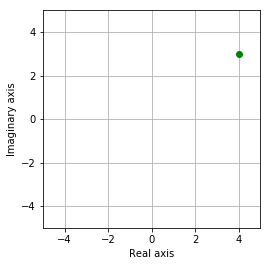

In [42]:
# plot the complex number on the complex plane

plt.plot(np.real(z),np.imag(z), 'go')

# Make it look nice
plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid(True)
plt.xlabel('Real axis'), plt.ylabel('Imaginary axis')
plt.show()

### Pythagorean theorem

* Used to calculate magnitude

$$magnitude=\sqrt{real^2+imaginary^2}$$

* Used to calculate phase (in radians)

$$phase=\arctan{\frac{imaginary}{real}}$$

* Maginitude is the distance from the origin to the point for a specific frequency

* Phase is measured relative to the positive real axis for a specific frequency

* Side Note: Complex Conjugate

To get the Complex Conjugate reverse the sign of the imaginary component

[a, ib] --> [a, -ib] 

Magnitude can be computed by multiplying the Complex Number by its Complex Conjugate

* Side Note: Radians to Degrees

Multiply by $\frac{180}{\pi}$

In [43]:
# Here are two ways to compute the magnitude (Pythagorean theorem)
mag = np.sqrt( np.real(z)**2 + np.imag(z)**2 )

# Using abs() is a little cleaner
mag = np.abs(z)

print(f'The magnitude is {mag}')

The magnitude is 5.0


In [44]:
# compute the angle of the complex number using Pythagorean theorem
phs = math.atan( np.imag(z) / np.real(z) )

# Using angle is a little cleaner
phs = np.angle(z)

print(f'The angle is {phs}')

The angle is 0.6435011087932844



---
## Euler's formula
---


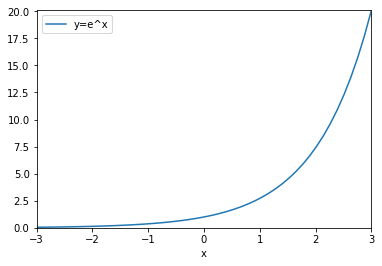

In [45]:
# linspace start, stop, sample
x = np.linspace(-3,3,num=50)

plt.plot(x,np.exp(x),label='y=e^x')

# some plotting touch-ups
plt.axis([min(x),max(x),0,np.exp(x[-1])])
plt.legend()
plt.xlabel('x')
plt.show()

## Euler's Formula
$$e^{jk}=cos(k)+jsin(k)$$

* Substituting $\pi$ for 0 we get

$$e^{j\pi} + 1 = 0$$

* Amplitude and phase can be easily seen in this formula

$$me^{j\theta}$$

* where 

    * m = Amplitude 
    * $\theta$ = Phase
    
    
* we can refer to these as Fourier coefficients ($me^{j\theta}$)

You pass a single number k representing the phase and frequency into sin and cosine to get imaginary numbers

Notice when time is .25 or any multiple of that, the point overlaps

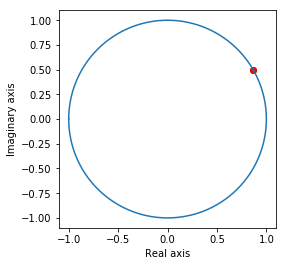

In [46]:
# The point [cos(k),sin(k)] is on the unit circle for any real k 

# define k (any real number)
time = .25
freq = 4
phs = 1/6*np.pi
k = 2*np.pi*freq*time+phs 

# Euler's notation
euler = np.exp(1j*k) # = cos(k) + jsin(k)

# plot the dot red will vary hold green constant
plt.plot(np.cos(phs),np.sin(phs),'go')
plt.plot(np.cos(k),np.sin(k),'ro')

# draw unit circle for reference
x = np.linspace(-np.pi,np.pi, num=100) # < -- take 100 steps
x = np.arange(-np.pi,np.pi,.01) # <-- take steps of .01

plt.plot(np.cos(x),np.sin(x))

# some plotting touch-ups
plt.axis('square')
plt.xlabel('Real axis'), plt.ylabel('Imaginary axis')
plt.show()

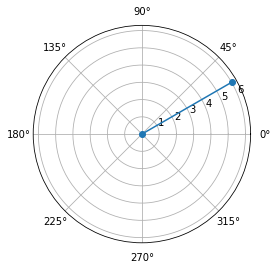

In [47]:
# Euler's formula with arbitrary vector magnitude

m = 6; # magnitude
k = np.pi/6; # phase
compnum = m*np.exp( 1j*k );

# extract magnitude and angle
mag = np.abs(compnum);
phs = np.angle(compnum);

plt.polar([0,phs],[0,mag],marker='o')
plt.show()



---
## sine waves and complex sine waves
---

* Sine Wave Formula

$$a\sin{2\pi ft+\theta}$$

* a = amplitude
* f = frequency
* $\theta$ = phase

Frequency: time between to peaks or two trophs (really any points spaced over a period) 

Measured in Hz $\frac{1}{s}$

* 1Hz repeats itself after 1 second
* 5Hz repeats itself after 2 seconds
* and so on...

Phase: the value of the sine wave as it crosses the point corresponding to time = 0

* Really just shifts across x axis
* phase is a circular measure doesn't necessarily go from - to +
* Most important are 0 and $\frac{\pi}{2}$ corresponding to sine and cosine respectively
    * sin(0) = 0
    * cosine($\frac{\pi}{2}$) = 0 
* side note cosine and sine are orthogonal

Amplitude: half the distance between peak and troph

* Not necessarily from 0 to peak

Frequency, Phase and Amplitude are all independent of one another



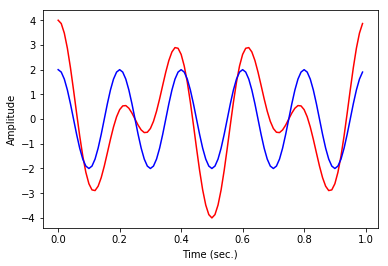

In [48]:
# Generating sine waves

srate1 = 100 # sampling rate in Hz
srate2 = 100

time1  = np.arange(0.,1.,1./srate1) # time in seconds
time2  = np.arange(0.,1.,1./srate2) # time in seconds


# sine wave param.eters
freq1 = 3    # frequency in Hz
freq2 = 5    # frequency in Hz

ampl = 2    # amplitude in a.u.
phas = np.pi/2 # phase in radians

# generate the sine wave
sinewave1 = ampl * np.sin( 2*np.pi * freq1 * time1 + phas )
sinewave2 = ampl * np.sin( 2*np.pi * freq2 * time2 + phas )
sinewave = sinewave1 + sinewave2

plt.plot(time1,sinewave,'r')
plt.plot(time2,sinewave2,'b')
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.show()

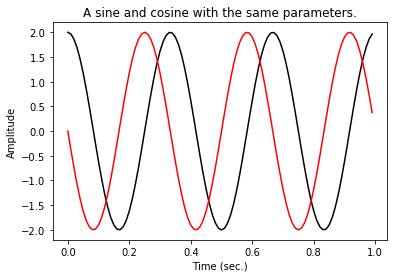

In [49]:
# sine and cosine are the same but for a phase shift

# generate the sine wave
sinewave = ampl1 * np.sin( 2*np.pi * freq1 * time1 + phas )
coswave  = ampl1 * np.cos( 2*np.pi * freq1 * time1 + phas )

plt.plot(time1,sinewave,'k',label='sine')
plt.plot(time1,coswave,'r',label='cosine')
plt.xlabel('Time (sec.)'), plt.ylabel('Amplitude')
plt.title('A sine and cosine with the same parameters.')
plt.show()

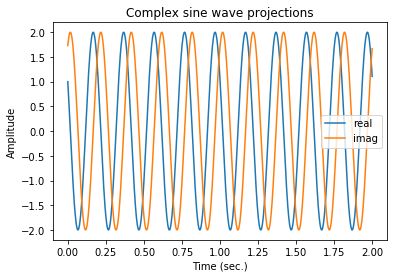

In [50]:
# complex sine waves

# general simulation parameters
srate = 500; # sampling rate in Hz
time  = np.arange(0.,2.,1./srate) # time in seconds

# sine wave parameters
freq = 5;    # frequency in Hz
ampl = 2;    # amplitude in a.u.
phas = np.pi/3; # phase in radians

# generate the sine wave
csw = ampl * np.exp( 1j* (2*np.pi * freq * time + phas) );

# plot the results
plt.plot(time,np.real(csw),label='real')
plt.plot(time,np.imag(csw),label='imag')
plt.xlabel('Time (sec.)'), plt.ylabel('Amplitude')
plt.title('Complex sine wave projections')
plt.legend()
plt.show()



---
## The dot product
---

* The dot product is a single number that tells you about the relationship between 2 vectors of equal size (same number of elements).


* Algebraic expression

    * $a \cdot b = \sum y_ix_i$
    

* Geometric expression

    * $a \cdot b = |a||b|\cos{\theta_{ab}}$
    
    
* Dot product is zero when angle meet at a right angle ("orthogonal")

* Dot product sign depends on angle
    
    * acute dp > 0
    * obtuse dp < 0
    
    

* Side Note When normalized, the dot product is the correlation coefficient

$$r=\frac{\sum_{i=1}^N(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^N(x_i-\bar{x})^2} \sqrt{\sum_{i=1}^N(y_i-\bar{y})^2}}$$

* Fourier Transform is not the same thing as a correlation coefficient, but there are some conceptual similarities

The dot product is a single number that reflects the relationship between two vectors (a vector is a list of numbers). The dot product is the computational backbone of many algorithms and mathematical operations, including the Fourier transform, convolution, and correlation. To compute the dot product between two vectors, simply point-wise multiply the corresponding elements and then sum over all elements. The larger the dot product, the more similar the two vectors are to each other (after accounting for the scaling of each vector, which might be arbitrary).

When you compute the dot product between a real-valued signal and a complex sine wave, the resulting dot product is also a complex number. In the context of the Fourier transform, the dot product of the signal with a complex sine wave is called a ”Fourier coefficient.”


In [51]:
# two vectors
v1 = [ 1, 2, 3 ];
v2 = [ 3, 2, 1 ];

# compute the dot product algebraically
dp = sum( np.multiply(v1,v2) )
dp = np.dot(v2, v1)

print(f'The dot product is {dp}')

The dot product is 10


#### A few things to note

* Changing the frequency in steps of +/- .5 or +/- 1 will result in a dot product of 0 the reason for this is the sampling rate

* Also a phase shift of $\frac{\pi}{2}$ will result in the dot product being 0

In [52]:
# dot products of sine waves

# general simulation parameters
srate = 500 # sampling rate in Hz
time  = np.arange(0.,2.,1./srate) # time in seconds

# sine wave parameters
freq1 = 5    # frequency in Hz
freq2 = 5    # frequency in Hz

ampl1 = 2    # amplitude
ampl2 = 2    # amplitude

phas1 = np.pi/2 # phase in radians
phas2 = np.pi/2 # phase in radians

# generate the sine wave
sinewave1 = ampl1 * np.sin( 2*np.pi * freq1 * time + phas1 )
sinewave2 = ampl2 * np.sin( 2*np.pi * freq2 * time + phas2 )

# compute dot product
dp = np.dot(sinewave1,sinewave2)

# print result
print(f'dot product = {dp}')

dot product = 2000.0


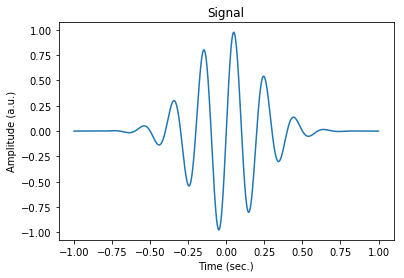

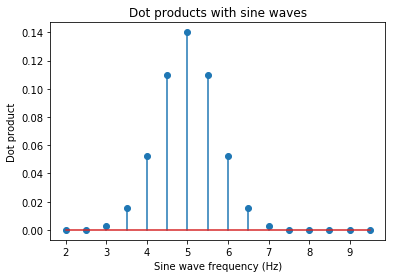

In [53]:
# with a signal

# phase of signal
# changing this number the phase will screw up
theta = 0*np.pi/4;


# simulation parameters
srate = 1000;
time  = np.arange(-1.,1.,1./srate)

# signal
sinew  = np.sin(2*np.pi*5*time + theta)
gauss  = np.exp( (-time**2) / .1);
signal = np.multiply(sinew,gauss)

# sine wave frequencies
sinefrex = np.arange(2.,10.,.5);

# plot signal
plt.plot(time,signal)
plt.xlabel('Time (sec.)'), plt.ylabel('Amplitude (a.u.)')
plt.title('Signal')
plt.show()



# initialize dot products vector
dps = np.zeros(len(sinefrex));

# loop over sine waves
for fi in range(1,len(dps)):
    
    # create sine wave
    sinew = np.sin( 2*np.pi*sinefrex[fi]*time)
    
    # compute dot product
    dps[fi] = np.dot( sinew,signal ) / len(time)


# and plot
plt.stem(sinefrex,dps)
plt.xlabel('Sine wave frequency (Hz)'), plt.ylabel('Dot product')
plt.title('Dot products with sine waves')
plt.show()


---
The complex dot product
---


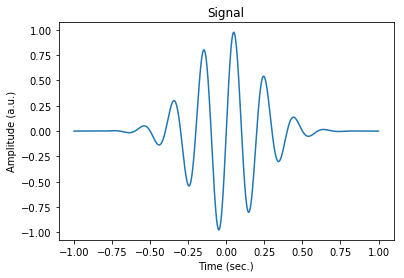

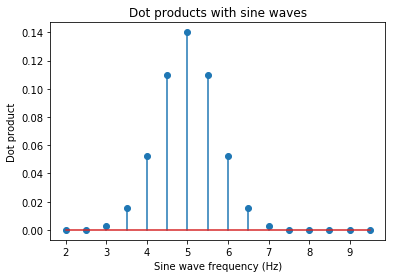

In [54]:
# phase of signal
# change this to 2 nothing happens to phase
theta = 0*np.pi/4;


# simulation parameters
srate = 1000;
time  = np.arange(-1.,1.,1./srate)

# signal
sinew  = np.sin(2*np.pi*5*time + theta)
gauss  = np.exp( (-time**2) / .1);
signal = np.multiply(sinew,gauss)


# sine wave frequencies
sinefrex = np.arange(2.,10.,.5);

# plot signal
plt.plot(time,signal)
plt.xlabel('Time (sec.)'), plt.ylabel('Amplitude (a.u.)')
plt.title('Signal')
plt.show()



# initialize dot products vector
dps = np.zeros(len(sinefrex));

# loop over sine waves
for fi in range(1,len(dps)):
    
    # create sine wave
    sinew = np.exp( 1j*2*np.pi*sinefrex[fi]*time )
    
    # compute dot product
    dps[fi] = np.abs( np.dot( sinew,signal ) / len(time) )


# and plot
plt.stem(sinefrex,dps)
plt.xlabel('Sine wave frequency (Hz)'), plt.ylabel('Dot product')
plt.title('Dot products with sine waves')
plt.show()

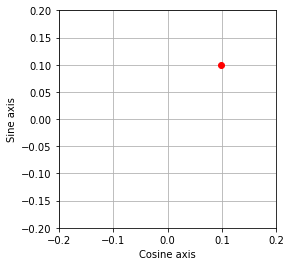

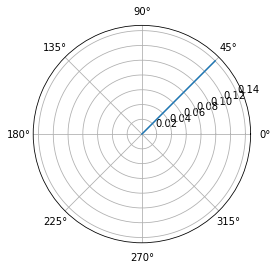

In [55]:
# in more detail...

# phase of signal
theta = 1*np.pi/4

# signal
sinew  = np.sin(2*np.pi*5*time + theta)
gauss  = np.exp( (-time**2) / .1)
signal = np.multiply(sinew,gauss)

# create sine and cosine waves
sinew = np.sin( 2*np.pi*5*time )
cosnw = np.cos( 2*np.pi*5*time )

# compute dot products
dps = np.dot( sinew,signal ) / len(time)
dpc = np.dot( cosnw,signal ) / len(time)

# combine sine and cosine into complex dot product
dp_complex = np.complex(dpc,dps) # cos/sin were swapped in the video
mag = np.abs(dp_complex)
phs = np.angle(dp_complex)

# and plot
plt.plot( dpc , dps ,'ro')
plt.xlabel('Cosine axis')
plt.ylabel('Sine axis')
plt.axis('square')
plt.grid(True)
plt.axis([-.2,.2,-.2,.2])
plt.show()

# draw a line using polar notation
plt.polar([0,phs],[0,mag])
plt.show()

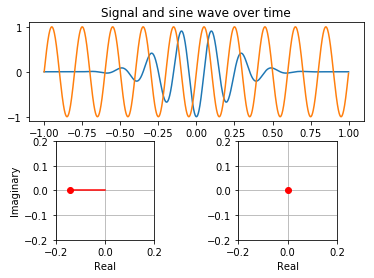

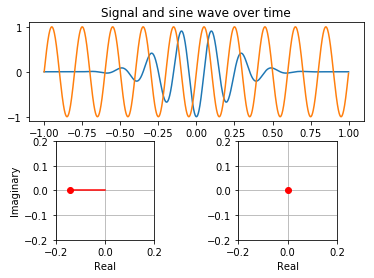

In [56]:
## illustration of the effect of phase offsets on dot products

# create complex sine wave
csw = np.exp( 1j*2*np.pi*5*time )
rsw = np.sin(    2*np.pi*5*time )

# specify range of phase offsets for signal
phases = np.linspace(0,7*np.pi/2,num=100)


for phi in range(0,len(phases)):
    
    # create signal
    sinew  = np.sin(2*np.pi*5*time + phases[phi])
    gauss  = np.exp( (-time**2) / .1)
    signal = np.multiply(sinew,gauss)

    # compute complex dot product
    cdp = np.sum( np.multiply(signal,csw) ) / len(time)

    # compute real-valued dot product
    rdp = sum( np.multiply(signal,rsw) ) / len(time)

    # plot signal and real part of sine wave
    pl.cla() # wipe the figure
    plt.subplot2grid((2,2), (0, 0), colspan=2)
    plt.plot(time,signal)
    plt.plot(time,rsw)
    plt.title('Signal and sine wave over time')

    # plot complex dot product
    plt.subplot2grid((2,2), (1, 0))
    plt.plot(np.real(cdp),np.imag(cdp),'ro')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.axis('square')
    plt.grid(True)
    plt.axis([-.2,.2,-.2,.2])
    plt.plot([0,np.real(cdp)],[0,np.imag(cdp)],'r')


    # draw normal dot product
    plt.subplot2grid((2,2), (1, 1))
    plt.plot(rdp,0,'ro')
    plt.xlabel('Real')
    plt.axis('square')
    plt.grid(True)
    plt.axis([-.2,.2,-.2,.2])


    # show plot    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    ttime.sleep(.01)
